In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = "2018-01-01"
end = datetime.today().strftime("%Y-%m-%d")

In [3]:
end

'2022-03-08'

In [4]:
df = web.DataReader("AAPL", data_source = "yahoo", start = start, end=end)

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.135750
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.128590
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.319633
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.790070
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.634842
...,...,...,...,...,...,...
2022-03-02,167.360001,162.949997,164.389999,166.559998,79724800.0,166.559998
2022-03-03,168.910004,165.550003,168.470001,166.229996,76678400.0,166.229996
2022-03-04,165.550003,162.100006,164.490005,163.169998,83737200.0,163.169998


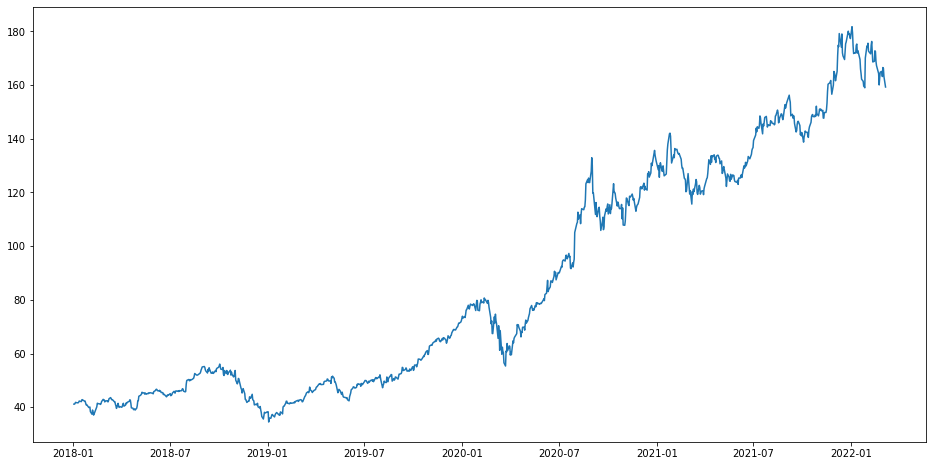

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df["Adj Close"]);

In [8]:
last_price = df["Adj Close"][-1]

In [10]:
returns = df["Adj Close"].pct_change()

In [12]:
daily_vol = returns.std()

In [13]:
num_simulations = 1000
num_days = 252

In [14]:
simulation_df = pd.DataFrame()
price_series = []

for i in range(num_simulations):
    price_series.clear()
    counter = 0
    
    price = last_price * (1+np.random.normal(0,daily_vol))
    price_series.append(price)
    
    for x in range(num_days):
        if counter == 251:
            break
        
        price = price_series[counter]*(1+np.random.normal(0,daily_vol))
        price_series.append(price)
        counter +=1
        
    simulation_df[i] = price_series

/var/folders/ld/2bq2qm754tbgdq4xyrwgddqc0000gn/T/ipykernel_38976/2748563899.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[i] = price_series


In [15]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,160.002498,160.121439,160.487627,163.758780,164.860868,157.130379,155.576540,162.780047,162.169119,159.633857,...,160.257768,153.909012,163.346357,164.618623,154.018799,160.082418,152.897188,155.819413,159.789737,162.981117
1,156.938681,162.081284,161.791031,162.339306,158.695546,152.693709,154.349869,159.440623,159.326037,160.864993,...,159.729945,148.167373,166.403184,163.830672,154.396213,163.059733,151.549195,160.610410,162.477767,166.779508
2,157.966970,164.021470,161.773653,157.180260,161.518247,152.682460,153.873236,161.441398,157.505785,157.049458,...,168.115420,150.299430,160.002631,166.231689,156.067773,163.344865,150.884317,158.381562,164.335754,166.821816
3,154.609887,163.808032,166.530197,155.843782,165.194115,155.095560,153.965294,160.357772,157.030158,159.365114,...,170.396398,150.907340,163.845680,165.648080,155.607702,159.595100,147.890289,158.902442,162.643401,169.915632
4,153.389849,161.206848,166.106207,159.585108,164.790237,155.922787,154.459246,159.023249,156.819952,157.360792,...,171.932291,149.458919,163.508674,165.990906,154.344019,160.459483,144.035971,151.647973,160.221535,169.547632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,140.259084,57.605008,237.642787,197.997589,140.689895,128.972091,138.176444,301.342028,101.431845,168.286394,...,92.511128,187.957076,92.465265,241.262085,116.592735,123.200227,151.116243,224.881271,176.815795,117.644448
248,140.313279,59.040203,232.875248,195.032318,143.060234,132.211470,141.500609,303.559119,98.928531,166.785282,...,87.871341,186.609790,92.850213,239.023209,118.652350,121.948893,145.470248,229.239997,165.442100,121.875438
249,139.409833,56.779564,228.674403,193.773710,143.249727,128.306989,143.543676,307.181580,98.859320,164.963628,...,87.627105,190.562873,90.943644,240.662943,116.599953,121.752542,147.490501,234.611543,173.120170,120.992930
250,133.359624,57.383317,235.173597,197.199262,139.252004,127.208580,143.854233,301.421840,98.305281,164.470393,...,89.577898,185.296058,89.545147,241.179057,117.702614,126.416354,145.226966,235.484672,170.093288,117.821244


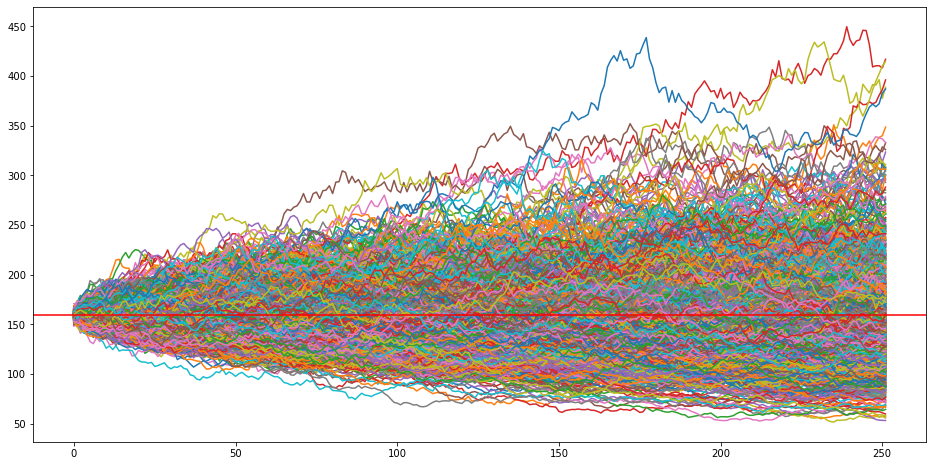

In [16]:
plt.figure(figsize=(16,8))
plt.plot(simulation_df)
plt.axhline(df["Adj Close"][-1], color="r")
plt.show;